# readme
descrip: plot AMOC Time Series for Sunway LR (transient and control) and HR (transient and control)<br>

update history: <br>
v1.0 DL 2021Feb06 <br>
v1.1 DL 2021Mar03 <br>
v1.2 DL 2021Apr24 <br>

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import cartopy
# import cartopy.crs as ccrs
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
# small data sets, no need for dask

# define parameters

In [3]:
date_str='2021Apr24'

# # --- time ---
# # year 1958 --> 123, year 2018 --> 183 for FOSI LR and HR, see Fred's email on 2020Oct08
# # year 1993 --> 158,
# yr_gap=2018-183 # real year - yr_gap = years used by FOSI LR and HR
# yrs = np.arange(1958,2019) # 2018 is the last year of FOSI run
# # yrs = np.arange(1993,1998)
# mons = np.arange(1,13)
# time1=pd.date_range(start=(str(yrs[0])+'-01-01'), end=(str(yrs[-1])+'-12-01'),freq="MS").shift(14, "D") # convert FOSI time to real time 
# # -----------
indir = '/scratch/group/ihesp/archive/Sunway_Runs/'

# --- TH (transient HR), CH (control HR) ---
infile_MOC_CH=indir+'HR_PI_CTRL/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.MOC.002101.050112.nc'
infile_MOC_TH=indir+'HR_HF_TNST/B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.MOC.185001.210012.nc'
# infile_MHT_HR = '/ihesp/shared/HR_OMIP2-CMIP6/g.e20.G.TL319_t13.control.001.pop.h.012301-018312.N_HEAT.nc' # Meridional Heat Transport
# -----------------------------------------

# --- TL (transient LR), CL (control LR) ---
infile_MOC_TL=indir+'LR_HF_TNST/B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.MOC.185001.210012.nc'
infile_MOC_CL=indir+'LR_PI_CTRL/B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.MOC.000101.050012.nc'
# infile_MHT_LR='/ihesp/shared/LR_OMIP2-CMIP6/g210.GIAF_JRA.v14.gx1v7.02.pop.h.012301-018312.N_HEAT.nc' # Meridional Heat Transport
# ----------

# --- outputs ---
# outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelChange_2020Dec15/DataAnalysis/pics/'
# pic1 = (outdir + 'AMOCTimeSeriesFOSI_HR_LR_' + date_str + '.png')
# ---------------

In [4]:
ds_MOC_TL = xr.open_dataset(infile_MOC_TL)
time_s_TL = ds_MOC_TL.time.to_pandas().index.shift(-1,'M')  # convert FOSI time (model year) to actual year
ds_MOC_TL = ds_MOC_TL.assign_coords(time=time_s_TL)
ds_MOC_TL

<xarray.Dataset>
Dimensions:         (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, time: 3012, transport_reg: 2)
Coordinates:
  * time            (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: d2, moc_comp, transport_reg
Data variables:
    time_bound      (time, d2) object ...
    moc_components  (moc_comp) |S256 ...
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

In [5]:
ds_MOC_CL = xr.open_dataset(infile_MOC_CL)
time_s_CL = ds_MOC_CL.time.to_pandas().index.shift(-1,'M') # shift 1 mon
ds_MOC_CL = ds_MOC_CL.assign_coords(time=time_s_CL)
ds_MOC_CL

<xarray.Dataset>
Dimensions:         (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nchar: 256, time: 6000, transport_reg: 2)
Coordinates:
  * time            (time) object 0001-01-31 00:00:00 ... 0500-12-31 00:00:00
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: d2, moc_comp, nchar, transport_reg
Data variables:
    time_bound      (time, d2) object ...
    moc_components  (moc_comp, nchar) |S1 ...
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-12 at 12:53:17.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [6]:
ds_MOC_TH = xr.open_dataset(infile_MOC_TH)
time_s_TH = ds_MOC_TH.time.to_pandas().index.shift(-1,'M') # shift 1 mon
ds_MOC_TH = ds_MOC_TH.assign_coords(time=time_s_TH)
ds_MOC_TH

<xarray.Dataset>
Dimensions:            (lat_aux_grid: 395, moc_comp: 1, moc_z: 63, time: 3012, transport_reg: 2)
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  (transport_reg) |S256 ...
    moc_components     (moc_comp) |S256 ...
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC                (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

In [7]:
ds_MOC_CH = xr.open_dataset(infile_MOC_CH)
time_s_CH = ds_MOC_CH.time.to_pandas().index.shift(-1,'M') # shift 1 mon
ds_MOC_CH = ds_MOC_CH.assign_coords(time=time_s_CH)
ds_MOC_CH

<xarray.Dataset>
Dimensions:            (lat_aux_grid: 395, moc_comp: 1, moc_z: 63, time: 5772, transport_reg: 2)
Coordinates:
  * time               (time) object 0021-01-31 00:00:00 ... 0501-12-31 00:00:00
    transport_regions  (transport_reg) |S256 ...
    moc_components     (moc_comp) |S256 ...
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC                (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

# make pics

In [8]:
MOC45_yr_TL = (ds_MOC_TL.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
             method='nearest').sel(moc_comp=0, transport_reg=1).resample(time='A').mean('time'))
MOC45_yr_TH = (ds_MOC_TH.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
             method='nearest').sel(moc_comp=0, transport_reg=1).resample(time='A').mean('time'))
MOC45_yr_TH

<xarray.DataArray 'MOC' (time: 251)>
array([15.120004 , 16.444918 , 17.04949  , 18.745255 , 18.02128  ,
       17.472525 , 19.309134 , 19.298847 , 16.547194 , 16.44132  ,
       17.866838 , 18.447832 , 18.24583  , 18.666765 , 19.489471 ,
       19.552494 , 18.886652 , 19.064049 , 20.06567  , 17.005636 ,
       18.355825 , 17.033075 , 15.549595 , 17.188482 , 17.022575 ,
       16.267538 , 15.423226 , 14.98082  , 16.338614 , 16.746784 ,
       16.724062 , 16.204107 , 17.77412  , 17.159117 , 17.709124 ,
       17.061163 , 16.997816 , 17.2236   , 17.453753 , 16.159822 ,
       18.948645 , 17.954468 , 18.067192 , 16.329098 , 16.063047 ,
       18.57193  , 17.360264 , 16.450151 , 15.205365 , 14.858092 ,
       16.542517 , 17.500652 , 18.101244 , 18.862825 , 19.317232 ,
       18.80632  , 18.272478 , 16.68756  , 18.833189 , 18.491484 ,
       16.604101 , 17.218168 , 15.859653 , 16.82247  , 14.904725 ,
       15.893887 , 17.2852   , 18.015795 , 16.249424 , 16.856848 ,
       14.396205 , 15.207012 , 17.637775 , 16.33367  , 14.221154 ,
       15.831758 , 15.293419 , 16.43131  , 16.830643 , 16.169401 ,
       16.950922 , 18.741636 , 15.779613 , 16.471302 , 16.107237 ,
       17.709185 , 19.629225 , 18.164423 , 16.942123 , 16.642088 ,
       19.177687 , 18.089403 , 17.240276 , 16.964226 , 16.677599 ,
       16.16825  , 15.707332 , 15.487254 , 15.890788 , 15.181844 ,
...
       16.957977 , 16.74568  , 16.416965 , 16.075766 , 17.299227 ,
       16.092182 , 16.73659  , 16.327955 , 16.596039 , 16.596071 ,
       14.964383 , 16.152273 , 15.720402 , 17.338995 , 16.311857 ,
       15.356696 , 14.643234 , 15.046252 , 14.98606  , 16.172945 ,
       16.442118 , 14.941468 , 14.686905 , 14.813628 , 12.498653 ,
       14.92043  , 15.647316 , 15.883114 , 16.8997   , 15.066585 ,
       16.16576  , 13.644112 , 14.594521 , 14.220506 , 13.649962 ,
       15.2827635, 12.606927 , 13.637975 , 12.573555 , 13.209984 ,
       14.42694  , 13.5409155, 14.508102 , 13.067329 , 13.729637 ,
       13.38221  , 14.207676 , 14.7184515, 14.494476 , 13.966252 ,
       13.6609335, 14.633298 , 12.829087 , 12.182702 , 12.118396 ,
       12.568867 , 13.099486 , 12.045475 , 11.895144 , 12.668895 ,
       14.085106 , 13.594117 , 13.243449 , 12.917737 , 11.162582 ,
       12.826046 , 11.664776 , 10.890426 , 10.397122 , 11.11139  ,
       11.858224 , 11.471057 , 12.16995  , 12.725026 , 11.236511 ,
       11.698628 , 11.909004 , 10.953728 , 11.494975 , 10.774434 ,
       10.411097 , 10.7522745, 10.278907 ,  9.243911 ,  9.131544 ,
       11.00893  , 10.387916 ,  9.752358 ,  9.703551 ,  9.887286 ,
       10.637841 ,  9.851748 ,  7.3754783, 10.189496 ,  9.702498 ,
        9.248578 ], dtype=float32)
Coordinates:
  * time               (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 44.76

In [9]:
MOC45_yr_CL = (ds_MOC_CL.MOC.sel(lat_aux_grid=45, moc_z=1000*100, method='nearest').sel(
              moc_comp=0, transport_reg=1).resample(time='A').mean('time')).isel(time=slice(249,500))
MOC45_yr_CH = (ds_MOC_CH.MOC.sel(lat_aux_grid=45, moc_z=1000*100, method='nearest').sel(
              moc_comp=0, transport_reg=1).resample(time='A').mean('time')).isel(time=slice(229,480))
MOC45_yr_CH

<xarray.DataArray 'MOC' (time: 251)>
array([14.737906 , 15.778675 , 16.669935 , 17.549597 , 18.107977 ,
       19.70096  , 20.196753 , 17.757113 , 17.901491 , 18.815481 ,
       15.854851 , 17.99136  , 19.490707 , 19.458567 , 16.850134 ,
       17.760893 , 18.888737 , 17.156462 , 16.249989 , 16.705202 ,
       18.01807  , 17.08821  , 15.352584 , 16.699097 , 16.694403 ,
       15.870086 , 18.35326  , 17.56015  , 17.924364 , 16.63582  ,
       16.273863 , 17.128468 , 16.446398 , 15.5597925, 17.979883 ,
       16.756975 , 17.862429 , 17.182348 , 17.790241 , 17.724213 ,
       17.849972 , 17.307213 , 18.782099 , 17.64312  , 17.227911 ,
       14.306367 , 16.46192  , 15.499446 , 16.84981  , 15.898164 ,
       15.711895 , 17.600012 , 19.875805 , 18.96318  , 16.882956 ,
       18.414276 , 18.3565   , 18.002132 , 18.485292 , 17.07608  ,
       16.904043 , 17.89406  , 16.071905 , 16.883541 , 16.722755 ,
       14.917775 , 16.152937 , 16.428804 , 16.93987  , 17.731165 ,
       17.586685 , 17.047867 , 17.28553  , 15.78384  , 17.11745  ,
       17.26727  , 16.99177  , 16.826544 , 14.875197 , 15.098518 ,
       16.209572 , 16.438963 , 15.668476 , 15.00977  , 15.366188 ,
       16.209211 , 16.21887  , 17.863462 , 17.469637 , 15.871525 ,
       16.996758 , 15.7471285, 16.605032 , 14.095641 , 13.610722 ,
       15.703313 , 16.808527 , 15.641094 , 15.186272 , 16.704012 ,
...
       16.623068 , 15.48726  , 15.010497 , 16.288404 , 16.067293 ,
       17.597128 , 17.945097 , 16.991247 , 18.02287  , 17.857824 ,
       15.629807 , 14.709565 , 15.29121  , 17.31498  , 15.518951 ,
       17.264135 , 17.740755 , 15.960709 , 16.992296 , 15.8122835,
       16.51659  , 16.45621  , 15.945292 , 16.11159  , 16.334864 ,
       16.306673 , 16.27603  , 16.013609 , 15.932195 , 15.693957 ,
       17.626211 , 18.089926 , 15.7911005, 17.653913 , 18.543905 ,
       18.376673 , 18.826271 , 15.280407 , 16.418467 , 17.603918 ,
       17.708725 , 15.684987 , 15.582009 , 15.764613 , 15.910282 ,
       14.576252 , 14.189282 , 16.132416 , 15.52736  , 14.957292 ,
       15.559045 , 16.228308 , 17.009363 , 16.51713  , 15.130643 ,
       18.346151 , 16.124907 , 15.280942 , 17.522564 , 17.631678 ,
       15.670704 , 13.643089 , 14.751443 , 15.388141 , 16.129488 ,
       15.466309 , 14.627364 , 14.856364 , 15.62559  , 18.203344 ,
       17.341614 , 17.57932  , 17.305622 , 16.38014  , 15.310462 ,
       16.709303 , 15.267247 , 16.433714 , 15.3128   , 17.42549  ,
       16.785591 , 16.672403 , 17.09649  , 18.50601  , 17.722488 ,
       16.721273 , 17.856611 , 17.56926  , 16.537376 , 16.866457 ,
       17.697252 , 15.6069975, 17.790743 , 16.271734 , 17.501293 ,
       16.933146 ], dtype=float32)
Coordinates:
  * time               (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 44.76

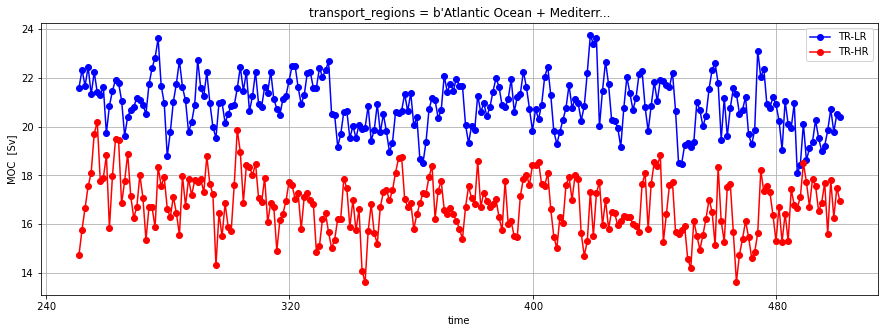

In [10]:
fig, axes = plt.subplots(1,1,figsize=(15, 5))
MOC45_yr_CL.plot(ax=axes, color='b', marker='o', label="TR-LR")
MOC45_yr_CH.plot(ax=axes, color='r', marker='o', label="TR-HR")
axes.set_ylabel('MOC  [Sv]')
plt.legend()
plt.grid()
# plt.savefig(pic1,bbox_inches='tight')

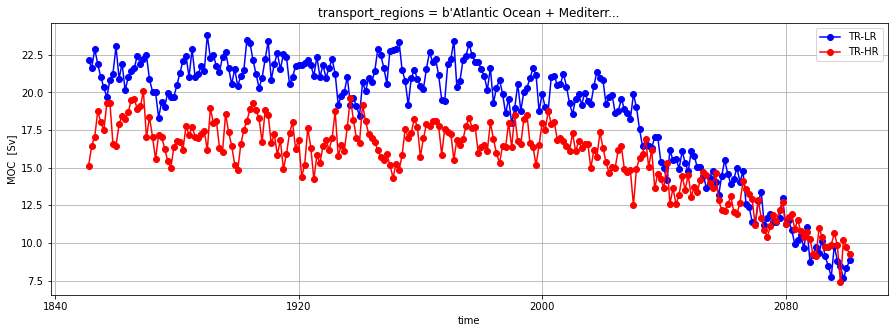

In [11]:
fig, axes = plt.subplots(1,1,figsize=(15, 5))
MOC45_yr_TL.plot(ax=axes, color='b', marker='o', label="TR-LR")
MOC45_yr_TH.plot(ax=axes, color='r', marker='o', label="TR-HR")
axes.set_ylabel('MOC  [Sv]')
plt.legend()
plt.grid()
# plt.savefig(pic1,bbox_inches='tight')

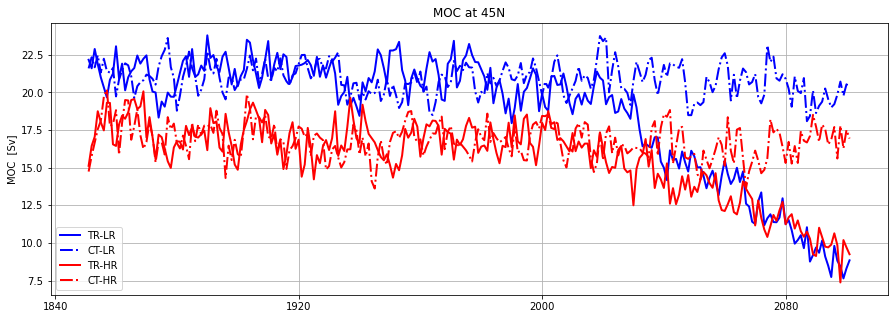

In [12]:
fig, axs = plt.subplots(1,1,figsize=(15, 5))
axs.plot(MOC45_yr_TL.time, MOC45_yr_TL, color='b', linewidth=2, label="TR-LR")
axs.plot(MOC45_yr_TL.time, MOC45_yr_CL, color='b', linestyle='-.', linewidth=2, label="CT-LR")

axs.plot(MOC45_yr_TL.time, MOC45_yr_TH, color='r', linewidth=2, label="TR-HR")
axs.plot(MOC45_yr_TL.time, MOC45_yr_CH, color='r', linestyle='-.', linewidth=2, label="CT-HR")

axs.set_ylabel('MOC  [Sv]')
axs.set_title('MOC at 45N')
# axs.set_xlim([1840,2110])
plt.legend()
plt.grid()
# plt.savefig(pic1,bbox_inches='tight')

# Appendix 
check MOC coordinates 

In [13]:
ds_MOC_TH.MOC

<xarray.DataArray 'MOC' (time: 3012, transport_reg: 2, moc_comp: 1, moc_z: 63, lat_aux_grid: 395)>
[149907240 values with dtype=float32]
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  (transport_reg) |S256 b'Global Ocean - Marginal Seas' ...
    moc_components     (moc_comp) |S256 b'Eulerian Mean'
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: transport_reg, moc_comp
Attributes:
    units:      Sverdrups
    long_name:  Meridional Overturning Circulation

In [14]:
ds_MOC_TH.MOC.sel(lat_aux_grid=45, moc_z=1000*100,
             method='nearest').sel(moc_comp=0, transport_reg=1)

<xarray.DataArray 'MOC' (time: 3012)>
array([11.917703, 15.644326, 16.27959 , ...,  9.647427, 11.984182,  8.552816],
      dtype=float32)
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 44.76
Attributes:
    units:      Sverdrups
    long_name:  Meridional Overturning Circulation